<a href="https://colab.research.google.com/github/MacroMuppet/PokerVision/blob/main/CV_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
images = np.load('/content/drive/My Drive/aicourse/images.npy')


In [ ]:
labels = pd.read_csv('/content/drive/My Drive/aicourse/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)         # Complete the code to check the shape

(4750, 128, 128, 3)
(4750, 1)


In [ ]:
print(type(images))         # Complete the code to check the data type
print(type(labels))         # Complete the code to check the data type

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


#### Images ndarrary Overview Anlysis (Stats in Pixel Values)

In [ ]:
print(images.dtype)         # Complete the code to check the data type
#print(labels.dtype)         # Complete the code to check the data type

uint8


In [ ]:
images.max() #find max of imgages in range of pixel values


255

In [ ]:
images.min()

0

In [ ]:
np.isnan(images).any() #find if any Nans in images

False

In [ ]:
print(images.mean()) #in pixel values
print(images.std()) #in pixel values
print(images.var()) #in pixel values


70.04363745545504
31.996876308515
1023.8000935024085


In [ ]:
np.histogram(images) #histogram of pixel values

(array([10676274, 51938865, 86564930, 58063658, 14345393,  4051990,
         5109309,  2380485,   299921,    41175]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

In [ ]:
images.sum(axis=0) #sum across VERTICAL axis

array([[[308812, 376148, 441656],
        [308522, 376448, 442202],
        [307348, 375527, 441463],
        ...,
        [301230, 370674, 438520],
        [300766, 370103, 438002],
        [301119, 370394, 437906]],

       [[307812, 375069, 440483],
        [307418, 375117, 440825],
        [306797, 374938, 440696],
        ...,
        [300777, 369982, 437879],
        [301068, 369867, 437681],
        [301245, 370175, 437731]],

       [[305890, 373460, 439100],
        [305704, 373661, 439343],
        [304861, 373269, 439288],
        ...,
        [299710, 369070, 437031],
        [299273, 368143, 436243],
        [299987, 369035, 436767]],

       ...,

       [[295666, 361546, 427256],
        [295133, 360660, 426534],
        [295386, 361109, 426845],
        ...,
        [290453, 357811, 423518],
        [291361, 358906, 424422],
        [291651, 358964, 424465]],

       [[295867, 361867, 427474],
        [296492, 361849, 427566],
        [295924, 361632, 427486],
        .

array([[[254, 254, 254],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [233, 230, 230],
        [232, 231, 231],
        [249, 249, 249]],

       [[254, 254, 254],
        [252, 252, 253],
        [255, 254, 255],
        ...,
        [243, 240, 242],
        [248, 248, 248],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [255, 255, 255],
        ...,
        [246, 246, 246],
        [254, 254, 254],
        [252, 252, 252]],

       ...,

       [[222, 214, 216],
        [229, 228, 229],
        [236, 236, 236],
        ...,
        [221, 216, 218],
        [220, 218, 216],
        [222, 223, 220]],

       [[223, 219, 219],
        [232, 231, 232],
        [236, 235, 235],
        ...,
        [217, 217, 218],
        [222, 219, 219],
        [223, 224, 221]],

       [[230, 223, 223],
        [231, 230, 231],
        [238, 238, 238],
        ...,
        [215, 214, 217],
        [220, 220, 221],
        [224, 224, 220]]], dtype=uint8)
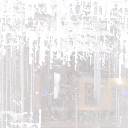

In [ ]:
images.max(axis=0) #max across VERTICAL axis

array([[[ 0,  4, 18],
        [ 1,  6, 16],
        [ 1,  4, 14],
        ...,
        [ 0,  0, 15],
        [ 0,  3, 16],
        [ 0,  8, 20]],

       [[ 0,  3,  8],
        [ 0,  5, 10],
        [ 0,  6, 13],
        ...,
        [ 1,  5, 19],
        [ 2,  9, 20],
        [ 0,  3, 20]],

       [[ 1,  5, 11],
        [ 2,  3, 11],
        [ 1,  1, 14],
        ...,
        [ 1, 10, 20],
        [ 1,  1, 18],
        [ 0,  0, 17]],

       ...,

       [[ 0,  8, 19],
        [ 0,  6, 10],
        [ 0,  5, 12],
        ...,
        [ 0,  9, 19],
        [ 0, 10, 21],
        [ 0,  8, 21]],

       [[ 0,  5, 14],
        [ 0,  5, 17],
        [ 0,  1,  9],
        ...,
        [ 0,  9, 14],
        [ 0,  6, 18],
        [ 0,  6, 15]],

       [[ 0,  5, 15],
        [ 1,  3, 13],
        [ 0,  2,  9],
        ...,
        [ 0,  7,  9],
        [ 0,  6, 18],
        [ 0,  6, 17]]], dtype=uint8)
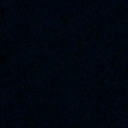

In [ ]:
images.min(axis=0) #min across VERTICAL axis

In [ ]:
images.sum(axis=1) #sum across horizontal axis in 2D array

array([[[ 6569,  8818, 11345],
        [ 6942,  9178, 11642],
        [ 7142,  9422, 11811],
        ...,
        [ 7465,  9463, 11659],
        [ 7704,  9606, 11737],
        [ 7807,  9637, 11828]],

       [[ 5474,  7562,  9537],
        [ 5222,  7309,  9295],
        [ 4716,  6925,  8940],
        ...,
        [ 5436,  7545,  9840],
        [ 5433,  7523,  9857],
        [ 5681,  7755, 10023]],

       [[ 7670,  9754, 12157],
        [ 7442,  9541, 11975],
        [ 7333,  9544, 11935],
        ...,
        [20551, 20304, 20371],
        [20922, 20655, 20684],
        [21072, 20791, 20753]],

       ...,

       [[13150, 13860, 14964],
        [12834, 13570, 14710],
        [11571, 12283, 13701],
        ...,
        [ 9968, 10591, 11997],
        [ 9969, 10634, 11977],
        [ 9985, 10715, 11991]],

       [[ 6054,  8321, 10701],
        [ 6108,  8339, 10802],
        [ 6287,  8656, 11108],
        ...,
        [ 6701,  9287, 11755],
        [ 6612,  9250, 11719],
        [ 6260,

In [ ]:
images.max(axis=1) #max across HORIZONTAL axis

array([[[ 97, 115, 128],
        [ 93, 108, 126],
        [ 91, 107, 123],
        ...,
        [ 86, 112, 127],
        [105, 131, 140],
        [116, 135, 143]],

       [[106, 126, 136],
        [ 87, 110, 124],
        [ 97, 122, 136],
        ...,
        [ 88,  98, 114],
        [ 82, 101, 111],
        [ 82,  97, 105]],

       [[154, 150, 149],
        [162, 156, 156],
        [161, 154, 152],
        ...,
        [188, 189, 189],
        [184, 187, 188],
        [183, 186, 188]],

       ...,

       [[202, 196, 195],
        [199, 197, 192],
        [191, 188, 185],
        ...,
        [163, 171, 169],
        [164, 171, 172],
        [159, 166, 168]],

       [[116, 142, 153],
        [107, 137, 152],
        [115, 145, 154],
        ...,
        [ 82, 105, 125],
        [ 80, 103, 121],
        [ 81, 108, 125]],

       [[120, 140, 144],
        [105, 137, 151],
        [114, 145, 161],
        ...,
        [ 85, 103, 118],
        [ 83, 106, 124],
        [ 78,  99, 127]]

In [ ]:
images.min(axis=1) #min across HORIZONTAL axis

array([[[ 9, 24, 46],
        [16, 32, 47],
        [ 8, 20, 39],
        ...,
        [24, 31, 53],
        [28, 40, 60],
        [18, 36, 63]],

       [[16, 19, 29],
        [ 6, 10, 20],
        [ 0,  0,  2],
        ...,
        [15, 28, 47],
        [ 7, 28, 42],
        [ 7, 24, 45]],

       [[25, 38, 50],
        [17, 31, 45],
        [18, 27, 47],
        ...,
        [85, 83, 91],
        [89, 85, 94],
        [87, 86, 90]],

       ...,

       [[20, 30, 48],
        [26, 36, 49],
        [24, 31, 35],
        ...,
        [25, 35, 43],
        [34, 34, 45],
        [34, 36, 46]],

       [[24, 23, 36],
        [18, 26, 34],
        [21, 26, 46],
        ...,
        [18, 27, 46],
        [19, 28, 50],
        [17, 28, 51]],

       [[17, 25, 46],
        [13, 27, 48],
        [14, 26, 46],
        ...,
        [16, 20, 37],
        [16, 24, 45],
        [18, 37, 54]]], dtype=uint8)

#### Labels DataFrame Overview Anlysis

In [ ]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
labels.tail()

,Label
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent
4749,Loose Silky-bent


In [ ]:
labels.dtypes


Label    object
dtype: object

In [ ]:
labels.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [ ]:
labels['Label'].unique() #unique names of species

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [ ]:
labels['Label'].nunique() #number of species

12

In [ ]:
labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [ ]:
labels.isnull().sum() # Provides a count of missing values in each column.

Label    0
dtype: int64

In [ ]:
labels.corr()

<ipython-input-56-1a343dc3c84c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  labels.corr()


""


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images, labels):
  """
  Plots random images from each class in images.npy and labels df.

  Args:
    images: A numpy array of images.
    labels: A pandas DataFrame of labels.
  """

  num_classes = 10
  categories = np.unique(labels)
  keys = dict(labels['Label'])

  rows = 3
  cols = 4

  fig = plt.figure(figsize=(10, 8))

  for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, len(labels))
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)
      ax.imshow(images[random_index, :])
      ax.set_title(keys[random_index])

  plt.show()

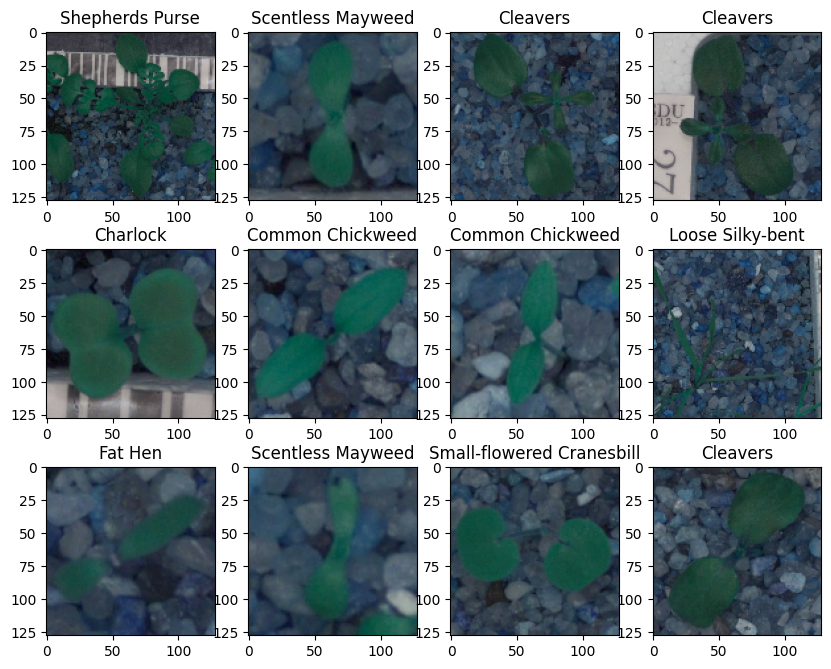

In [ ]:
plot_images(images,labels)

In [ ]:
# prompt: write code that checks the distribution of the target variable to check for data imbalance using sns as seaborne

import matplotlib.pyplot as plt
sns.countplot(x='Label', data=labels)
plt.title('Distribution of Plant Seedlings')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


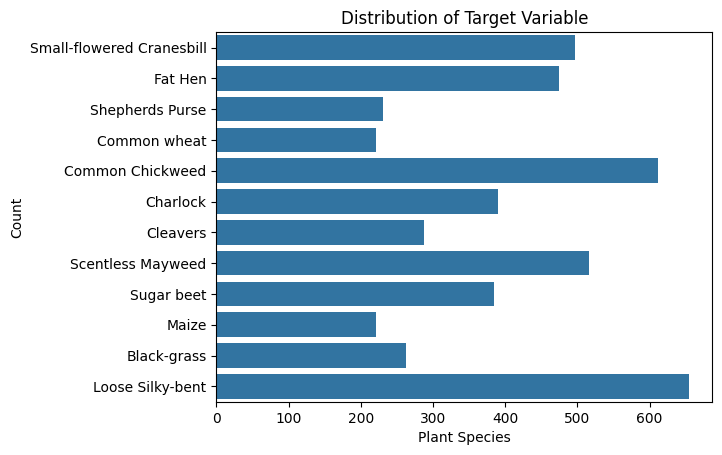

In [ ]:
sns.countplot(labels['Label'])
plt.title('Distribution of Target Variable')
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.show()

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Complete the code to convert the images from BGR to RGB

In [ ]:
#check to see if succussful conversion to RGB above...
for i in range(len(images)):
  if not np.array_equal(images[i], cv2.cvtColor(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), cv2.COLOR_RGB2BGR)):
    print("Images were not converted to RGB.")
    break
else:
  print("Images were successfully converted to RGB.")

Images were successfully converted to RGB.


### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64                    # Complete the code to define the height as 64
width =  64                   # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

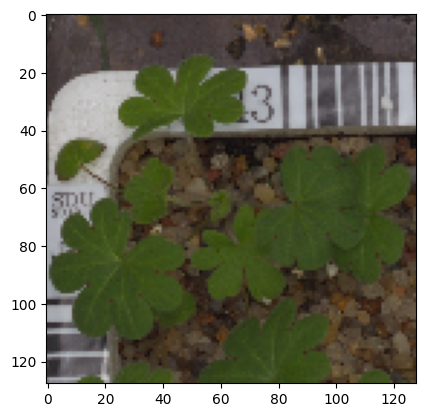

In [ ]:
plt.imshow(images[3])

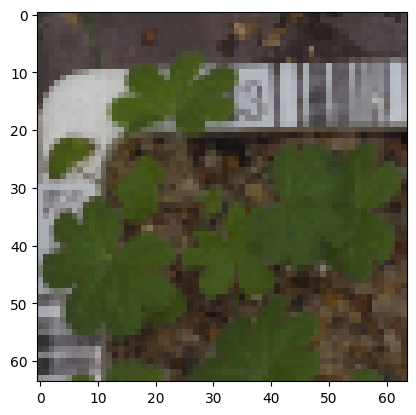

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [ ]:
enc = LabelBinarizer()                                        # Complete the code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train['Label'])        # Complete the code to fit and transform y_train
y_val_encoded = enc.transform(y_val['Label'])                  # Complete the code to transform y_val
y_test_encoded = enc.transform(y_test['Label'])                # Complete the code to transform y_test


((3847, 12), (428, 12), (475, 12))

In [ ]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape   # Complete the code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [ ]:
# we know max is 255 and min is 0
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()                             # Complete the code to intialize a sequential model

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

#### Fitting model on training data then validating

In [ ]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)


Epoch 1/30
121/121 - 8s - loss: 2.4526 - accuracy: 0.1141 - val_loss: 2.4370 - val_accuracy: 0.1285 - 8s/epoch - 67ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3438 - accuracy: 0.1890 - val_loss: 2.1547 - val_accuracy: 0.3271 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0247 - accuracy: 0.3140 - val_loss: 1.7902 - val_accuracy: 0.3808 - 1s/epoch - 9ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8468 - accuracy: 0.3566 - val_loss: 1.6362 - val_accuracy: 0.4463 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.6798 - accuracy: 0.4156 - val_loss: 1.4965 - val_accuracy: 0.5140 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.5455 - accuracy: 0.4448 - val_loss: 1.3592 - val_accuracy: 0.5701 - 1s/epoch - 10ms/step
Epoch 7/30
121/121 - 1s - loss: 1.4752 - accuracy: 0.4661 - val_loss: 1.2014 - val_accuracy: 0.5911 - 1s/epoch - 10ms/step
Epoch 8/30
121/121 - 2s - loss: 1.3861 - accuracy: 0.4903 - val_loss: 1.1374 - val_accuracy: 0.6215 - 2s/epoch - 13ms/step
Epoch 9/30
121/121 -

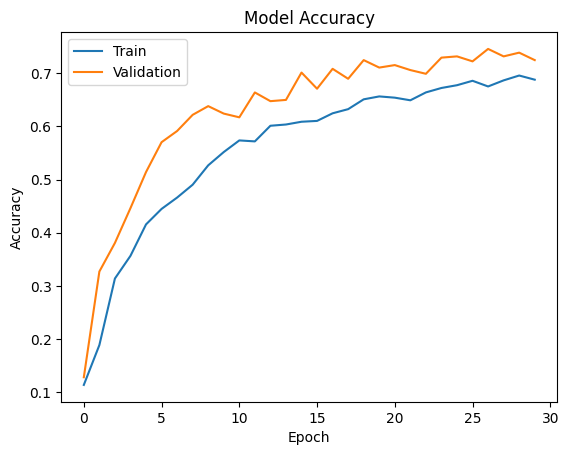

In [ ]:
# model Evaluation fitting to Train and using validation for validating
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluating Model on TEST Data

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9158 - accuracy: 0.7242 - 448ms/epoch - 30ms/step


In [ ]:
# @title Plotting Confusion Matrix
y_pred = model1.predict(X_test_normalized)

15/15 [==============================] - 0s 7ms/step


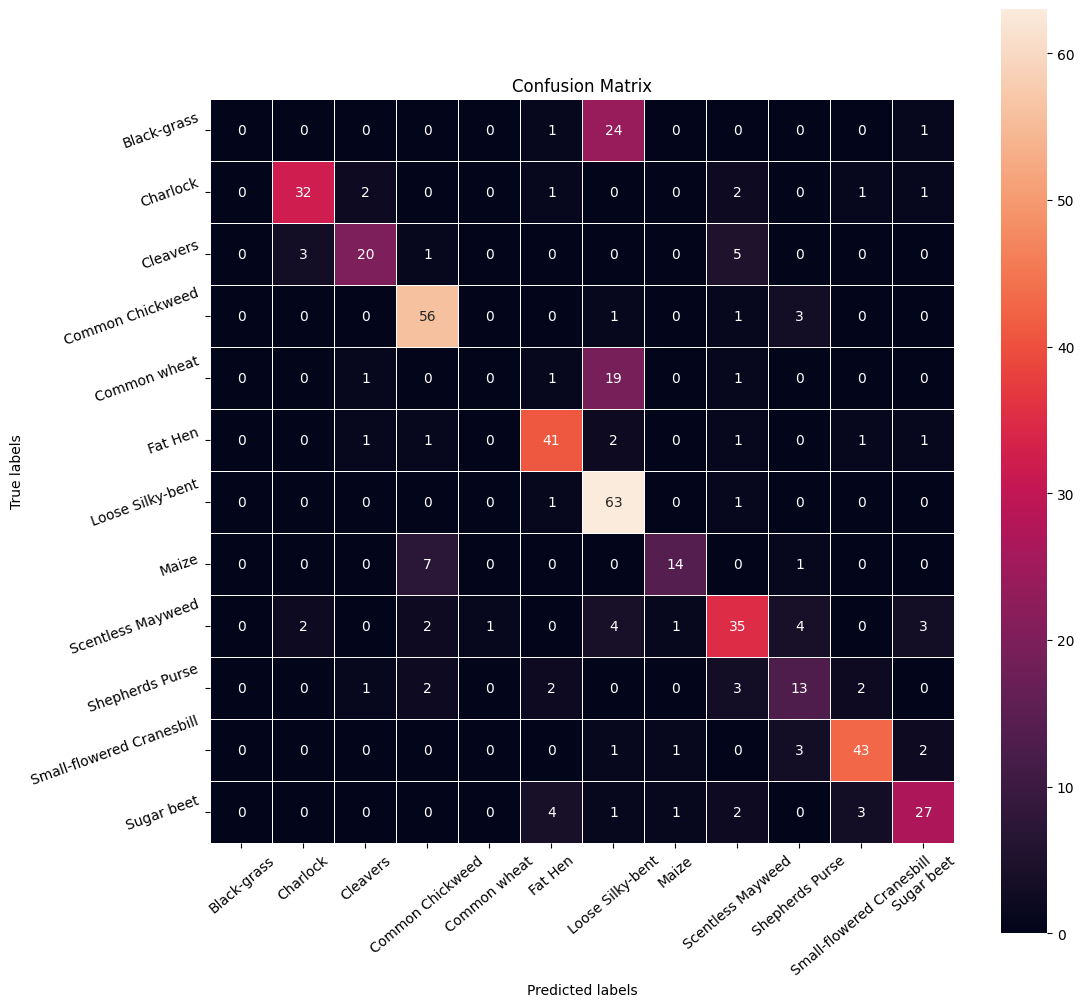

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)              # y_pred_arg and y_test_arg
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
cr = metrics.classification_report(y_test_arg,y_pred_arg)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.86      0.82      0.84        39
           2       0.80      0.69      0.74        29
           3       0.81      0.92      0.86        61
           4       0.00      0.00      0.00        22
           5       0.80      0.85      0.83        48
           6       0.55      0.97      0.70        65
           7       0.82      0.64      0.72        22
           8       0.69      0.67      0.68        52
           9       0.54      0.57      0.55        23
          10       0.86      0.86      0.86        50
          11       0.77      0.71      0.74        38

    accuracy                           0.72       475
   macro avg       0.63      0.64      0.63       475
weighted avg       0.67      0.72      0.69       475



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


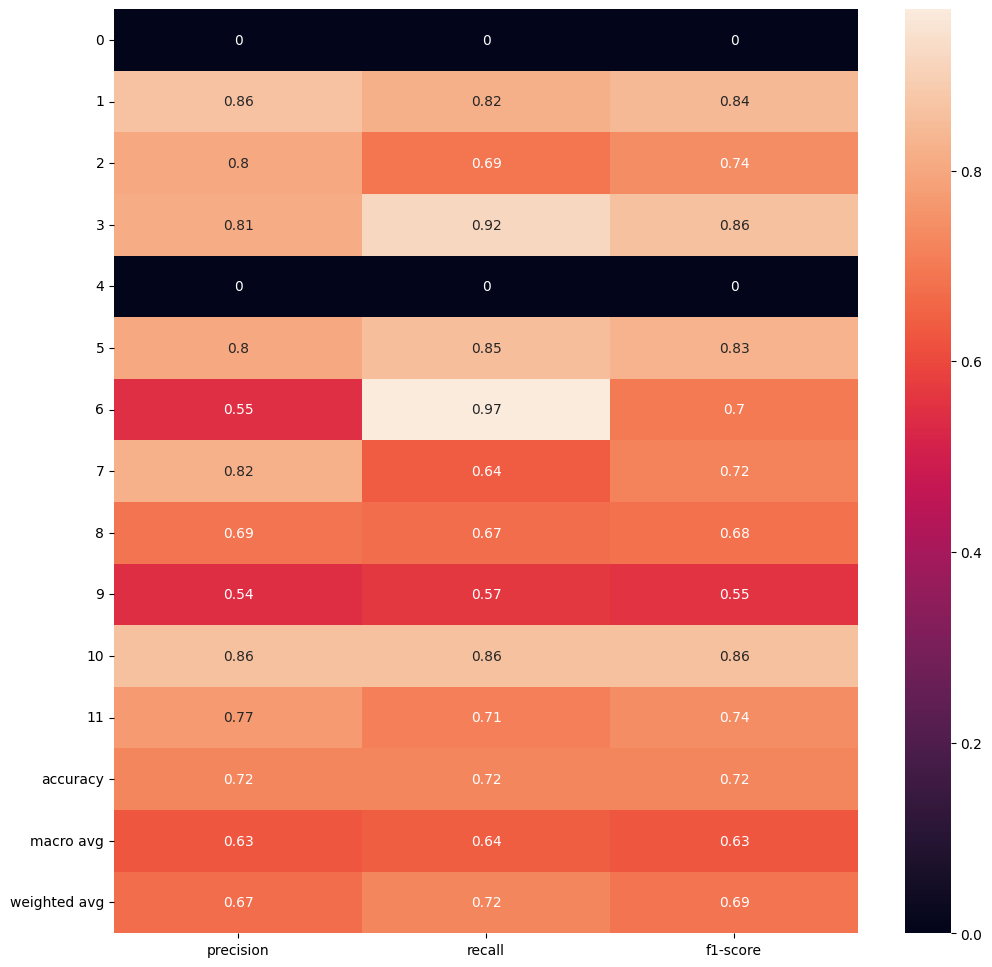

In [ ]:
# @title Heatmap of Classification Report to Easily identify Extreme Values
plt.figure(figsize=(12, 12))
sns.heatmap(pd.DataFrame(metrics.classification_report(y_test_arg,y_pred_arg, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


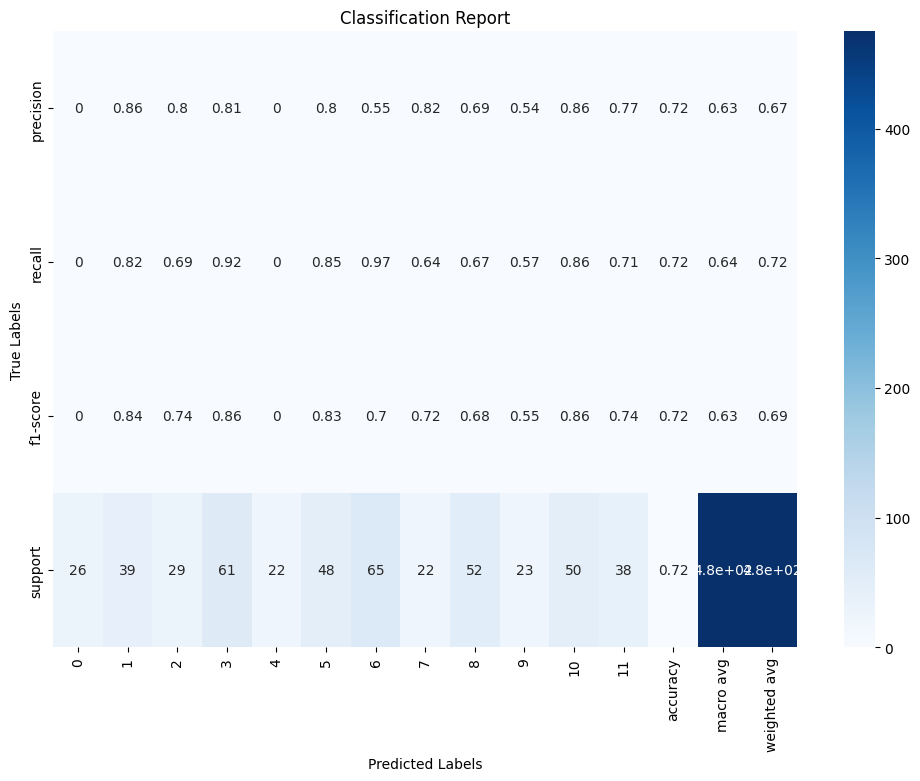

In [ ]:
# @title Blue Classification Report Transposed
# Create a classification report dataframe
cr_df = pd.DataFrame(metrics.classification_report(y_test_arg, y_pred_arg, output_dict=True))

# Plot the classification report
plt.figure(figsize=(12, 8))
sns.heatmap(cr_df, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


    # Explanation of each input for LRReduction...
    # - `ReduceLROnPlateau` is a callback function that reduces the learning rate when a metric has stopped improving.
    # - `monitor='val_accuracy'` specifies that the validation accuracy will be monitored.
    # - `patience=3` specifies that the learning rate will be reduced after 3 epochs of no improvement in validation accuracy.
    # - `verbose=1` specifies that the learning rate reduction will be printed to the console.
    # - `factor=0.5` specifies that the learning rate will be reduced by half each time it is reduced.
    # - `min_lr=0.00001` specifies that the learning rate will not be reduced below 0.00001.


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# @title Need to Clear and Fix Seed for reproducability

# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# @title Data augmentation is a technique used in machine learning, particularly in the context of training Convolutional Neural Networks (CNNs), to artificially expand the training dataset by creating modified versions of the training images.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# @title CNN Model 2 with Augmented Test Data
# Intializing a sequential model2
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded, #flow means passed in batches y_train_encoded is one-hot encoded
                                       batch_size=batch_size,
                                       shuffle=False), #Data specifically not shuffled at each epoch
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction]) #callbacks of LRR function to reduce learning rate for training when metric has stopped improving

Epoch 1/30
60/60 [==============================] - 12s 117ms/step - loss: 2.1385 - accuracy: 0.2329 - val_loss: 2.3971 - val_accuracy: 0.2360 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 87ms/step - loss: 1.6912 - accuracy: 0.4132 - val_loss: 2.2783 - val_accuracy: 0.2430 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 11s 185ms/step - loss: 1.4933 - accuracy: 0.4806 - val_loss: 2.1598 - val_accuracy: 0.3645 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 8s 129ms/step - loss: 1.4167 - accuracy: 0.5081 - val_loss: 2.0976 - val_accuracy: 0.4626 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 5s 91ms/step - loss: 1.2944 - accuracy: 0.5437 - val_loss: 1.7737 - val_accuracy: 0.4766 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 4s 69ms/step - loss: 1.2137 - accuracy: 0.5678 - val_loss: 1.6631 - val_accuracy: 0.6145 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 4s 70ms/step - loss

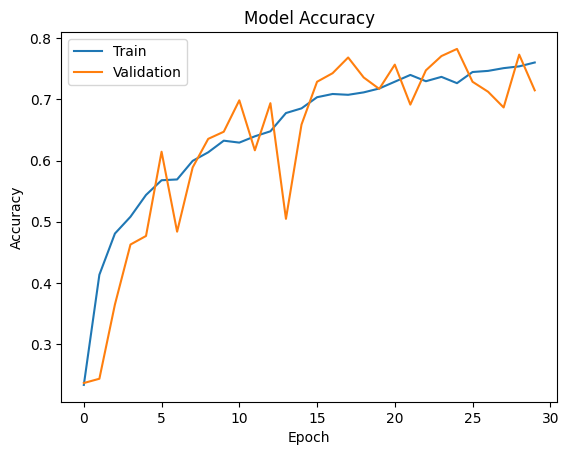

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)
# model3  = 15/15 - 0s - loss: 0.8868 - accuracy: 0.7221 - 193ms/epoch - 13ms/step
# model2  = 15/15 - 0s - loss: 0.9188 - accuracy: 0.7179 - 453ms/epoch - 30ms/step

15/15 - 0s - loss: 0.9188 - accuracy: 0.7179 - 453ms/epoch - 30ms/step


In [ ]:
# Complete the code to obtain the output probabilities
y_pred = model2.predict(X_test_normalized) #X_test_normalized because we are prediciting Y from testing data

15/15 [==============================] - 0s 3ms/step


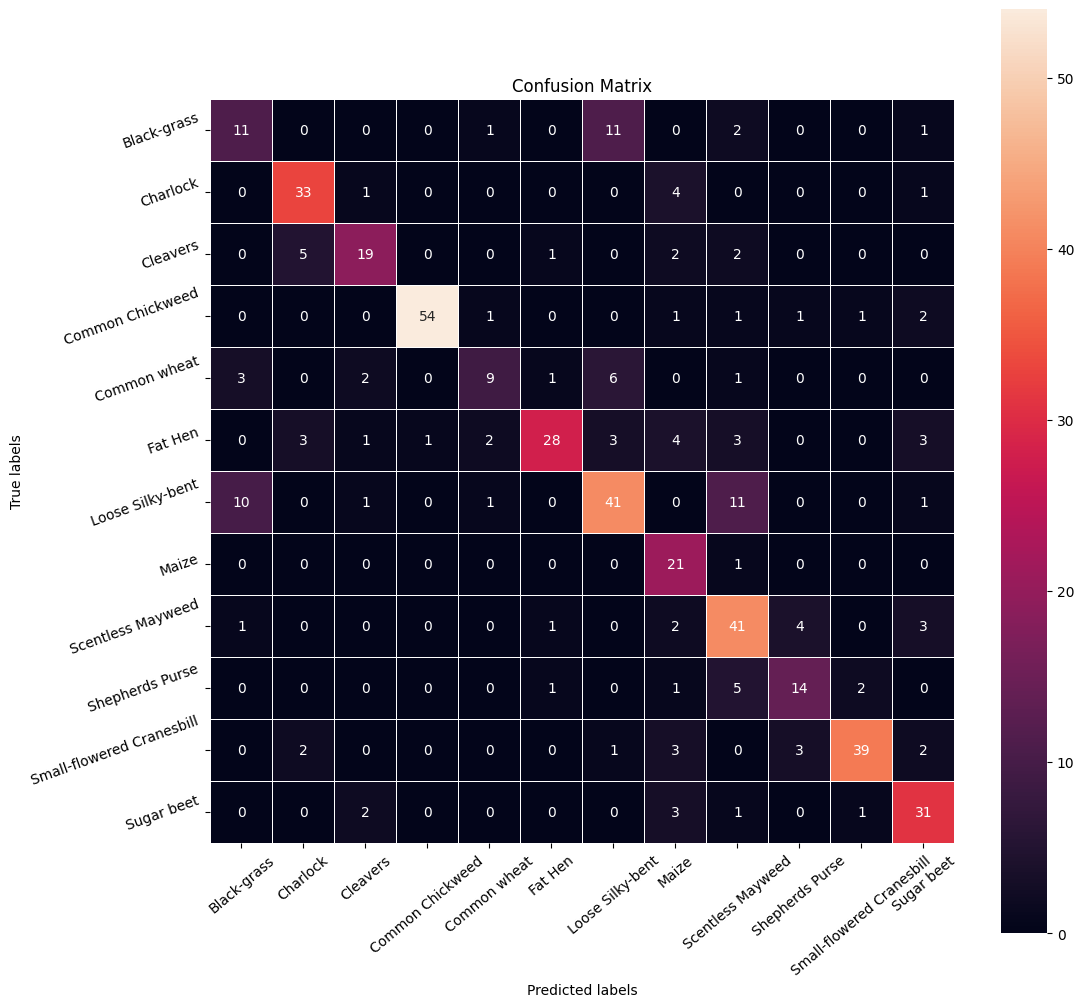

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [ ]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.44      0.42      0.43        26
           1       0.77      0.85      0.80        39
           2       0.73      0.66      0.69        29
           3       0.98      0.89      0.93        61
           4       0.64      0.41      0.50        22
           5       0.88      0.58      0.70        48
           6       0.66      0.63      0.65        65
           7       0.51      0.95      0.67        22
           8       0.60      0.79      0.68        52
           9       0.64      0.61      0.62        23
          10       0.91      0.78      0.84        50
          11       0.70      0.82      0.76        38

    accuracy                           0.72       475
   macro avg       0.71      0.70      0.69       475
weighted avg       0.74      0.72      0.72       475



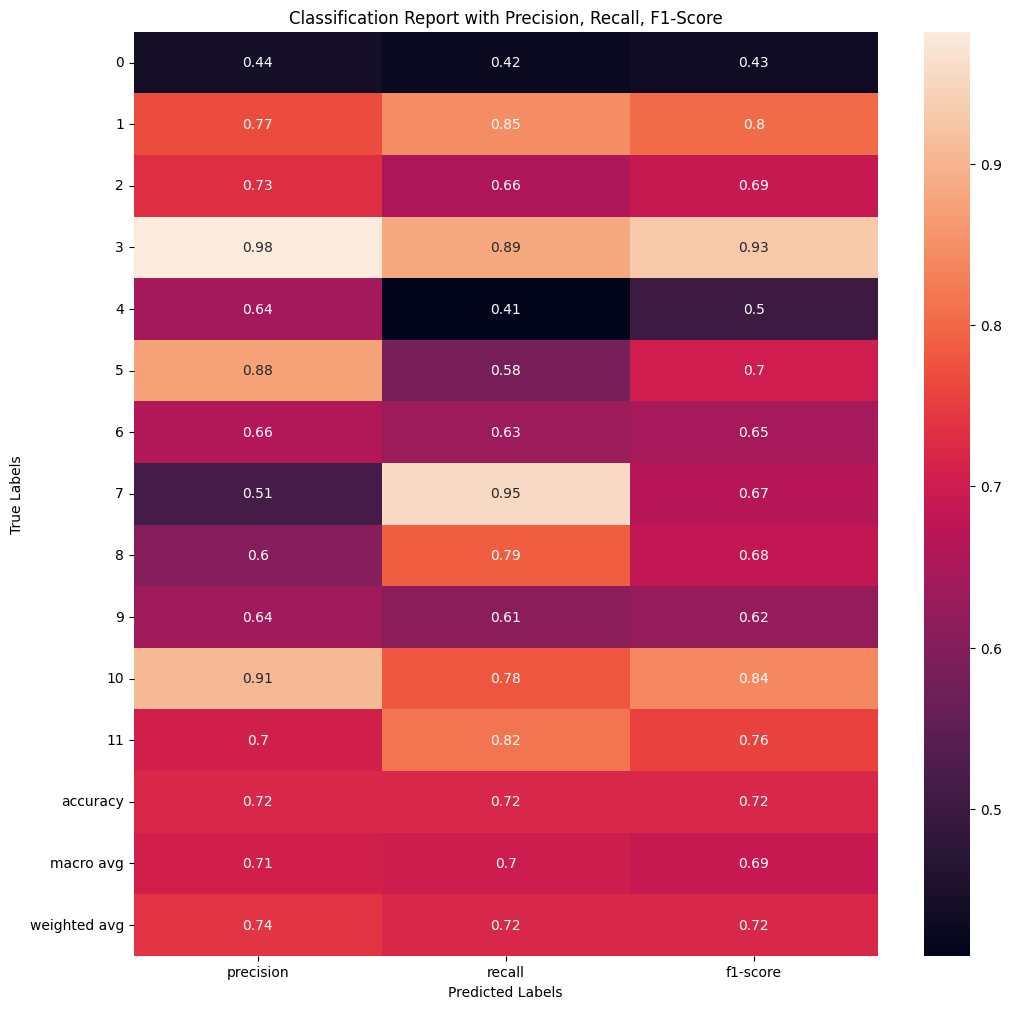

In [ ]:
# @title Heatmap of Classification Report to Easily identify Extreme Values
plt.figure(figsize=(12, 12))
sns.heatmap(pd.DataFrame(metrics.classification_report(y_test_arg,y_pred_arg, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.title('Classification Report with Precision, Recall, F1-Score')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 16)          0

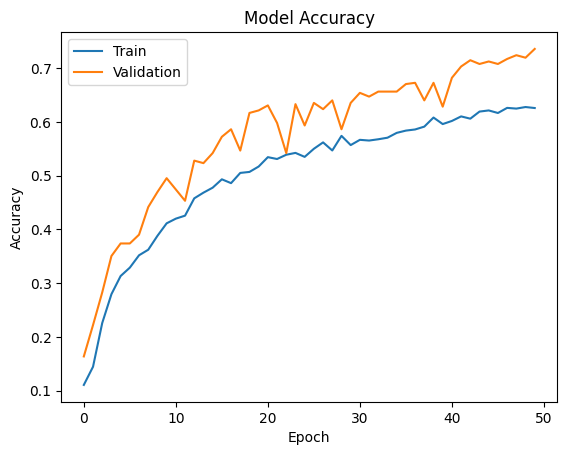

15/15 - 0s - loss: 0.8868 - accuracy: 0.7221 - 193ms/epoch - 13ms/step
15/15 [==============================] - 0s 3ms/step


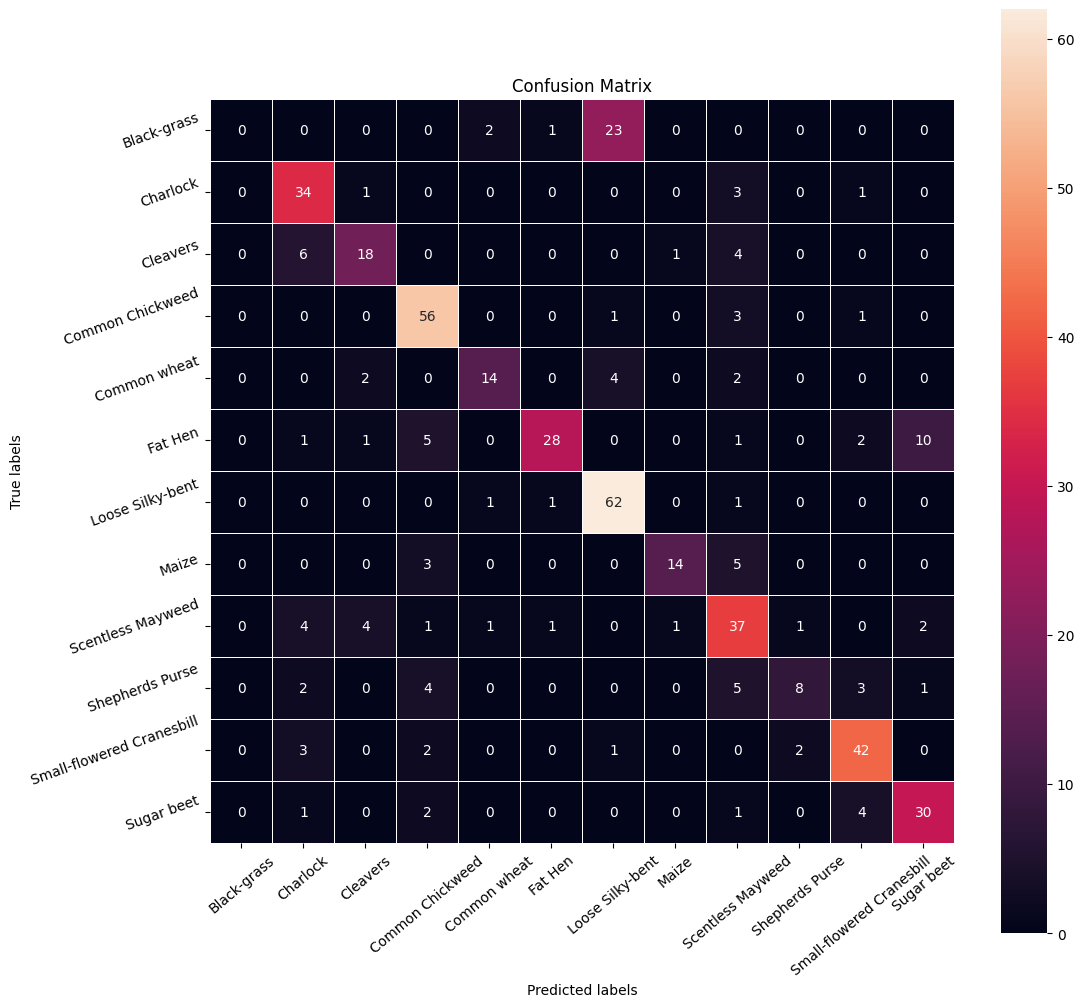

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.67      0.87      0.76        39
           2       0.69      0.62      0.65        29
           3       0.77      0.92      0.84        61
           4       0.78      0.64      0.70        22
           5       0.90      0.58      0.71        48
           6       0.68      0.95      0.79        65
           7       0.88      0.64      0.74        22
           8       0.60      0.71      0.65        52
           9       0.73      0.35      0.47        23
          10       0.79      0.84      0.82        50
          11       0.70      0.79      0.74        38

    accuracy                           0.72       475
   macro avg       0.68      0.66      0.66       475
weighted avg       0.70      0.72      0.70       475



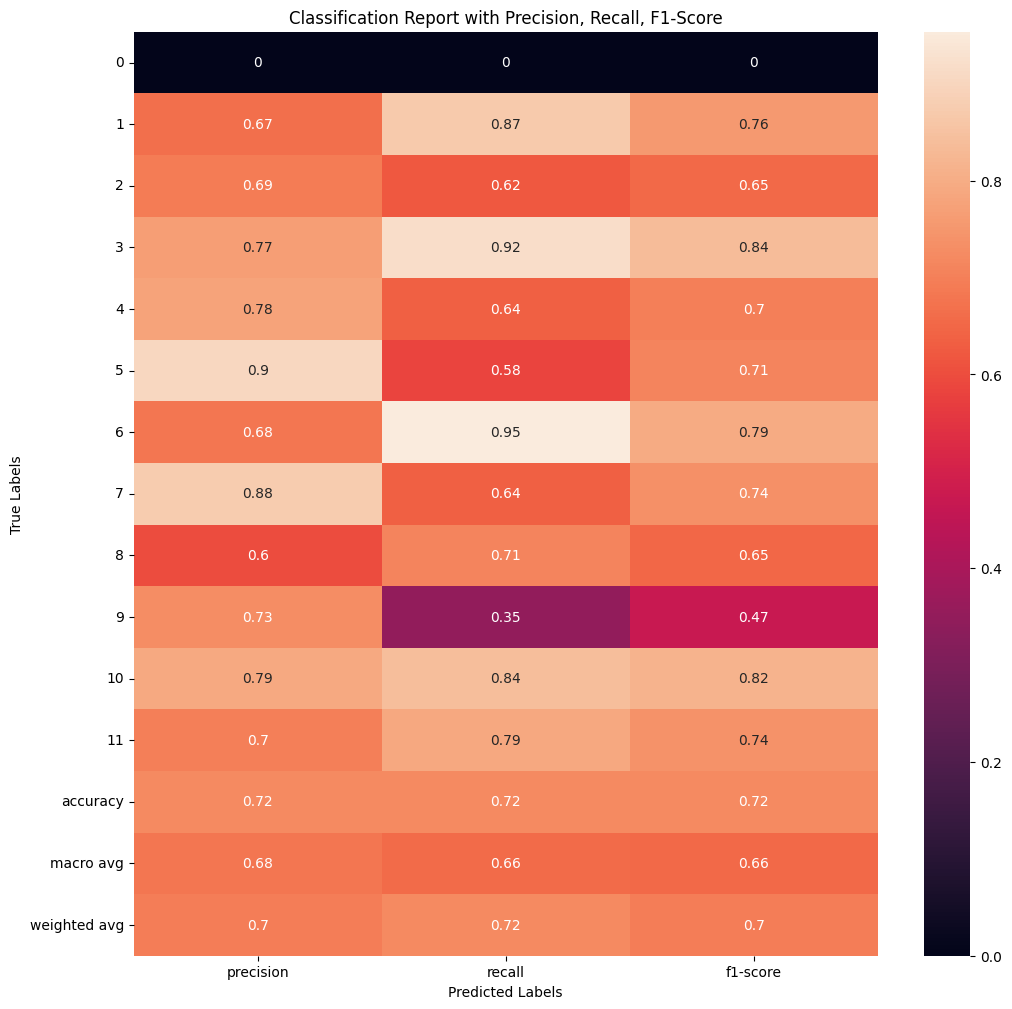

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Intializing a sequential model
model3 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding a second conv layer with 32 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of second conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding a third conv layer with 16 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
model3.add(Conv2D(16, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of third conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding a fourth conv layer with 8 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
model3.add(Conv2D(8, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of fourth conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model3.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model3.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model3.add(Dense(12, activation='softmax'))

# Initializing Adam Optimimzer
opt=Adam()

# Compiling model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

# Epochs
epochs = 50

# Batch size
batch_size = 64

# Data augmentation is a technique used in machine learning, particularly in the context of training Convolutional Neural Networks (CNNs), to artificially expand the training dataset by creating modified versions of the training images.
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

# ReduceLROnPlateau is a callback function that reduces the learning rate when a metric has stopped improving.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fitting model on training data then validating
history = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded, #flow means passed in batches y_train_encoded is one-hot encoded
                                       batch_size=batch_size,
                                       shuffle=False), #Data specifically not shuffled at each epoch
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction]) #callbacks of LRR function to reduce learning rate for training when metric has stopped improving

# Plotting the accuracy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluating the model on test data
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# Obtaining the output probabilities
y_pred = model3.predict(X_test_normalized)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Plotting the Confusion Matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

# Plotting the Heatmap of Classification Report to Easily identify Extreme Values
plt.figure(figsize=(12, 12))
sns.heatmap(pd.DataFrame(metrics.classification_report(y_test_arg,y_pred_arg, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.title('Classification Report with Precision, Recall, F1-Score')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Final Model


**Model Comparison:**

**Model 3:**
- Loss: 0.8868
- Accuracy: 0.7221
- Training Time: 193ms/epoch
- Inference Time: 13ms/step
- Epochs: 50

**Model 2:**
- Loss: 0.9188
- Accuracy: 0.7179
- Training Time: 453ms/epoch
- Inference Time: 30ms/step
- Epochs: 30

**Model 1:**

- Loss: 0.9158
- Accuracy: 0.7242
- Training Time: 448ms/epoch
- Inference Time: 30ms/step
- Epochs: 30

**Comparison:**

- **Accuracy:** Model 3 has a slightly higher accuracy (0.7221) compared to Model 2 (0.7179) but slightlly lower than Model1 (0.7242).
- **Loss:** Model 3 has a lower loss (0.8868) compared to Model 2 (0.9188) and Model1 (0.9188).
- **Training Time:** Model 3 has a shorter training time (193ms/epoch) compared to Model 2 (453ms/epoch) and Model3 (448ms/epoch).
- **Inference Time:** Model 3 has a shorter inference time (13ms/step) compared to Model 2 (30ms/step).
- **Epochs:** Model3 has 20 more epochs than model2 which is fine because its faster to run.

**Conclusion:**

Based on the given data, Model 3 outperforms Model 2 in terms of accuracy, loss, training time, and inference time. Therefore, Model 3 is a better model compared to Model 2 and model 1



Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

Model 3 is best for model visualization because:

1. **Deeper Architecture**: Model 3 has a deeper architecture with more convolutional layers (6) compared to Model 2 (4). This allows Model 3 to learn more complex features and improve its accuracy. The deeper architecture provides more opportunities for visualization and analysis of the learned features.

2. **Batch Normalization**: Model 3 uses batch normalization layers after each convolutional layer. This helps stabilize the training process and reduces overfitting, leading to better generalization performance. Batch normalization layers can be visualized to understand how they normalize the activations and improve the model's stability.

3. **Dropout Regularization**: Model 3 uses dropout layers with a dropout rate of 0.3. This helps prevent overfitting by randomly dropping out neurons during training. Dropout layers can be visualized to observe the impact of dropout on the model's predictions and feature importance.

4. **Data Augmentation**: Model 3 uses data augmentation techniques such as rotation and filling mode 'nearest' to artificially expand the training dataset. This helps improve the model's robustness and generalization performance. Data augmentation can be visualized to understand how it transforms the input data and enhances the model's ability to handle variations in the input.

5. **Better Performance**: Model 3 has a higher accuracy (0.7221) and lower loss (0.8868) compared to Model 2 (0.7179 accuracy and 0.9188 loss). The better performance of Model 3 indicates that it has learned more meaningful features and is more capable of making accurate predictions. This makes it more suitable for model visualization as it allows for a clearer understanding of the model's decision-making process.

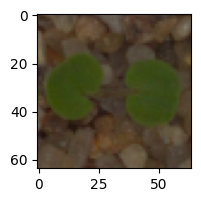

1/1 [==============================] - 0s 113ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


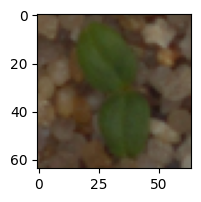

1/1 [==============================] - 0s 16ms/step
Predicted Label ['Charlock']
True Label Cleavers


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])

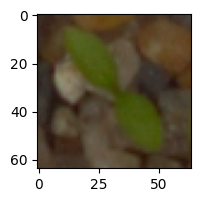

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


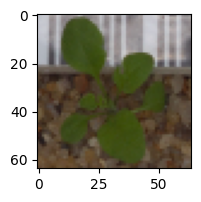

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Actionable Insights and Business Recommendations

# **Actionable Insights:**

* **Identify Mislabeled Images:** Model 3 can be used to identify images that have been mislabeled in the dataset. This information can be used to improve the accuracy of the model and the overall dataset quality.
* **Detect Anomalies:** Model 3 can be used to detect anomalies or outliers in the dataset. These anomalies may represent rare or unusual cases that are important to identify and understand.
* **Image Classification:** Model 3 can be deployed in a production environment to classify images in real-time. This can be useful for applications such as product recognition, quality control, and medical diagnosis.
* **Transfer Learning:** The weights learned by Model 3 can be used to initialize a new model for a different but related task. This technique, known as transfer learning, can save time and resources in training a new model from scratch.

# **Business Recommendations:**

* **Improve Product Quality:** Model 3 can be used to improve product quality by detecting defects and anomalies in manufacturing processes. This can help reduce costs and improve customer satisfaction.
* **Enhance Customer Experience:** Model 3 can be used to enhance customer experience by providing personalized recommendations and product suggestions. This can lead to increased sales and customer loyalty.
* **Optimize Inventory Management:** Model 3 can be used to optimize inventory management by predicting demand and identifying slow-moving products. This can help reduce inventory costs and improve cash flow.
* **Fraud Detection:** Model 3 can be used to detect fraudulent transactions and activities. This can help protect businesses from financial losses and reputational damage.

# **Additional Use Cases for Model 3:**

* **Medical Diagnosis:** Model 3 can be used to assist in medical diagnosis by analyzing medical images such as X-rays, MRI scans, and CT scans.
* **Self-Driving Cars:** Model 3 can be used in self-driving cars to recognize objects, pedestrians, and traffic signs.
* **Agriculture:** Model 3 can be used in agriculture to identify crop diseases, pests, and weeds.
* **Retail:** Model 3 can be used in retail to analyze customer behavior, optimize store layouts, and predict demand for products.
* **Security:** Model 3 can be used in security applications to detect suspicious activities and identify potential threats

*

_____